In [1]:
import sys
from random import random
sys.path.append('../')

In [2]:
from moed.model import Sequence, Model
from moed.analysis import Analysis
from moed.proc import Proc

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import struct 

X = [x/1000 for x in range(1000)]
with open("../data/pgp_f4-1K-1ms.dat", "br") as f:
    Y = list(struct.unpack('1000f', f.read()))


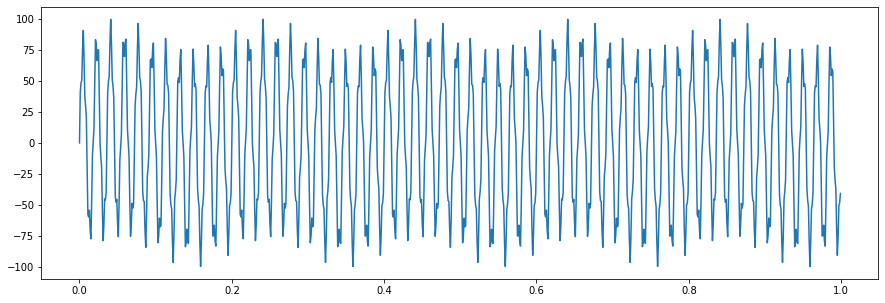

In [5]:
from collections import OrderedDict

signal = Sequence.from_dict(OrderedDict(zip(X,Y)))
signal.plot()

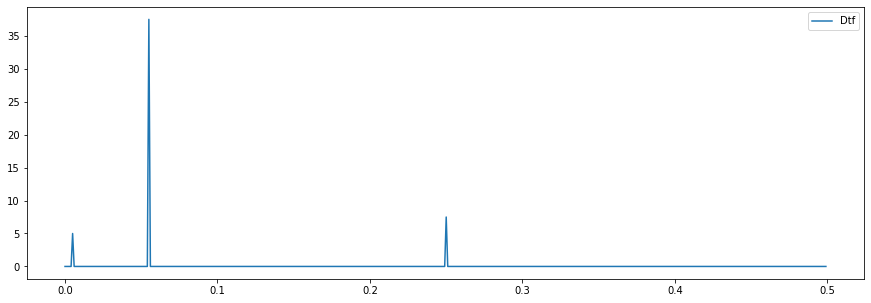

In [6]:
dtf_signal = Analysis.dtf(signal)

fig, axes = plt.subplots(1, figsize=(15, 5))
axes.plot(dtf_signal.x, dtf_signal.y, label="Dtf")
axes.legend()
plt.show()

In [30]:
for x, y in dtf_signal._seq.items():
    if y > 0.1:
        print(f"Частота: {x/0.001:.3f} Hz\t Амплитуда: {2*y:.2f}")

Частота: 5.000 Hz	 Амплитуда: 10.00
Частота: 55.000 Hz	 Амплитуда: 75.00
Частота: 250.000 Hz	 Амплитуда: 15.00


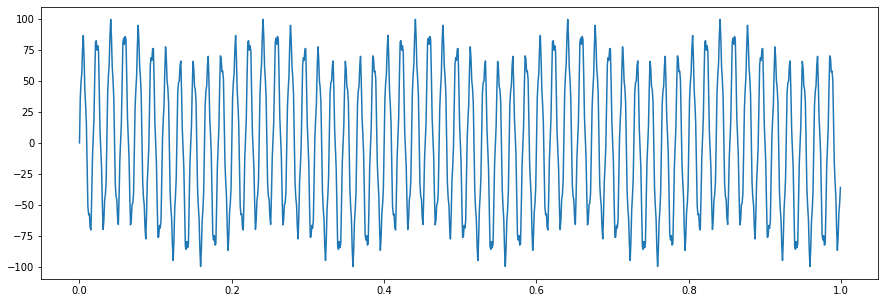

In [29]:
harm1 = Model.harmonic(X, freq=250, amp=10)
harm2 = Model.harmonic(X, freq=55, amp=75)
harm3 = Model.harmonic(X, freq=5, amp=15)
(harm1 + harm2 + harm3).plot()

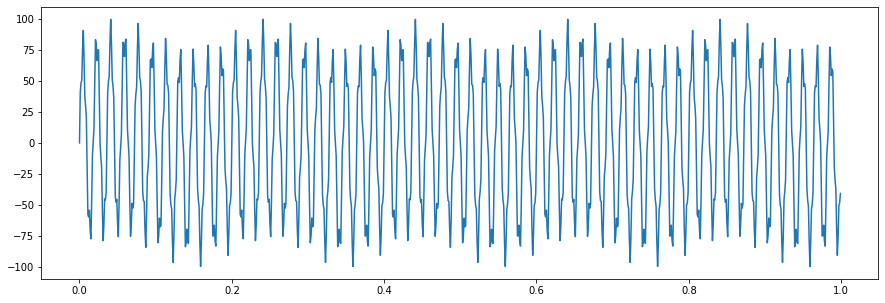

In [13]:
signal.plot()